# <center><font size="+4"><b style="color:#E25033;"><u>Analyse de Graphe </u></b></center>


# Plus Court Chemain A*

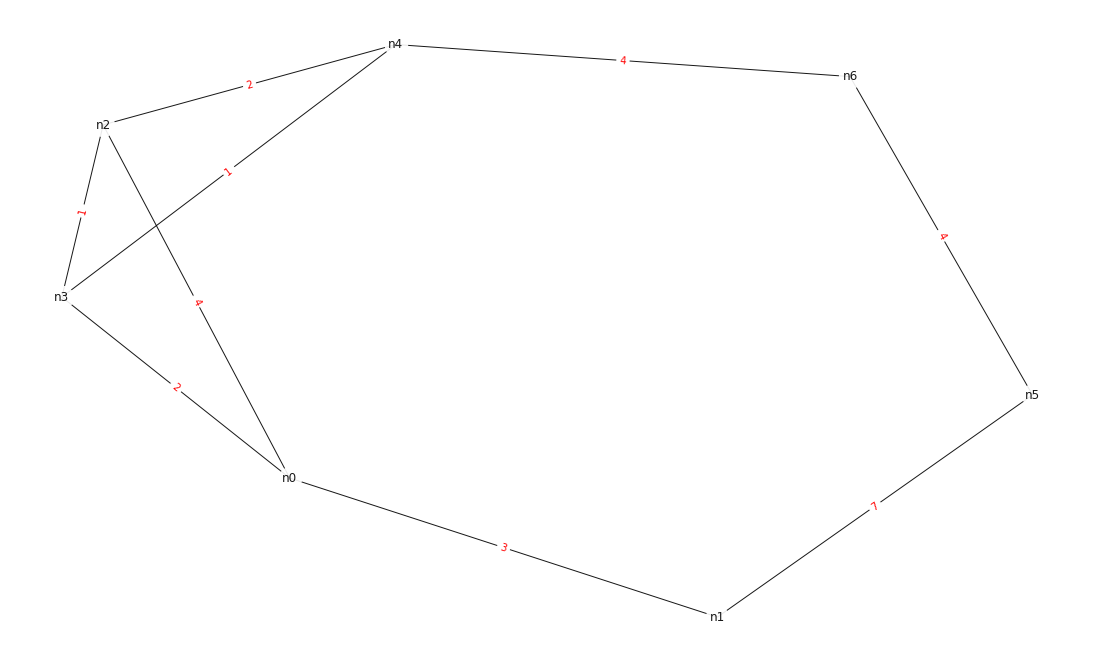

In [75]:
import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy

graph = [['n0', 'n3'],['n0', 'n2'],['n0', 'n1'],['n1', 'n5'],['n1', 'n0'],['n2', 'n4'],['n3', 'n2'],['n3', 'n4'],['n3', 'n0'],['n4', 'n6'],['n4', 'n2'],['n5', 'n6'],['n5', 'n1'],['n6', 'n5']]

notre_graph=nx.Graph()
notre_graph.add_edges_from(graph)
pos = nx.spring_layout(notre_graph)
plt.figure(figsize =(15, 9))   
nx.draw(notre_graph,pos,edge_color='black',width=1,linewidths=1,node_size=500,node_color='white',alpha=0.9,labels={node:node for node in notre_graph.nodes()})
nx.draw_networkx_edge_labels(notre_graph,pos,edge_labels={('n0', 'n3'):2,('n0', 'n2'):4,('n0', 'n1'): 3,('n1', 'n5'): 7,('n2', 'n4'):2,('n3', 'n2'): 1,('n3', 'n4'):1,('n4', 'n6'): 4,('n5', 'n6'): 4},font_color='red')
plt.show()


graph1 = {
    'n0': ['n1', 'n2','n3'],
    'n1': ['n5'],
    'n2': ['n4'],
    'n3': ['n2','n4'],
    'n4': ['n6'],
    'n5': ['n6'],
    'n6':[],
    }

cout_2 = {
        'n0': {'n1':3,'n2':4,'n3':2},
        'n1': {'n5':7},
        'n2': {'n4':2},
        'n3': {'n2':1,'n4':1},
        'n4': {'n6':4},
        'n5': {'n6':4},
        'n6': {}
        }

heuristique_2 = {
        'n0': 9,
        'n1':2,
        'n2':2,
        'n3': 5,
        'n4':3,
        'n5':2,
        'n6':0
        }   

In [173]:
depart= input("Quel est votre point de départ: ")
if depart not in graph1.keys():
    print('ce choix nexiste pas' )
    
arrive=input("Vous voulez aller où ? : ")
if arrive not in graph1.keys():
    print('ce choix nexiste pas' )

Quel est votre point de départ: n0
Vous voulez aller où ? : n6


In [139]:
liste_ouvert=[]
liste_close=[]
liste_ouvert.append((depart,9,None))

In [140]:
def explore(triple):
    result = []
    depart = triple[0]
    liste_arrive = graph1.get(depart)
    for i in liste_arrive:
        heur_dep = heuristique_2.get(depart)
        heur = heuristique_2.get(i)
        # calcule de la fonction f=g+h
        tmp = triple[1] - heur_dep +  heur + cout_2.get(depart).get(i)
        result.append((i,tmp,depart))
    return result

In [141]:
explore([depart,9,None])

[('n1', 5, 'n0'), ('n2', 6, 'n0'), ('n3', 7, 'n0')]

In [142]:
def min_triple(list_triple):
    if len(list_triple) == 0:
        return []
    result = list_triple[0]
    for i in list_triple:
        if i[1] < result[1]:
            result = i
    return result

In [143]:
min_triple([('n1', 5, 'n0'), ('n2', 6, 'n0'), ('n3', 7, 'n0')])

('n1', 5, 'n0')

In [144]:
def depart_similaire(triple,list_triple):
    result = []
    for i in list_triple:
        if i[0] == triple[0]:
            result.append(i)
    return result


In [145]:
depart_similaire(('n1', 6, 'n0'),([('n1', 5, 'n0'), ('n2', 6, 'n0'), ('n3', 7, 'n0')]))

[('n1', 5, 'n0')]

In [146]:
def elimine(list_triple):
    if len(list_triple) == 0:
        return  []
    result =  []
    for i in list_triple:
        my_list = depart_similaire(i,list_triple)
        if len(my_list) > 1:
            minimum = min_triple(my_list)
            my_list.remove(minimum)
            result = removeAll(list_triple,my_list)
        else:
            result.append(i)
    return result

In [148]:
def equalsTriple(triple1,triple2):
    return triple1[0] == triple2[0] and triple1[1] == triple2[1] and triple1[2] == triple2[2]
 

In [169]:
equalsTriple(('n1', 5, 'n0'),('n1', 5, 'n0'))

True

In [170]:
def removeAll(liste_triple, liste_toRemove):
    result = []
    for i in liste_triple:
        for j in liste_toRemove:
            if not equalsTriple(i,j):
               result.append(i) 
    return result

In [172]:
removeAll([('n3', 7, 'n0')],[('n1', 5, 'n0')])

[('n3', 7, 'n0')]

In [152]:
def est_dans(noeud, liste_triple):
    for i in liste_triple:
        if noeud == i[0]:
            return True
    return False


In [153]:
est_dans('n6',[('n1', 5, 'n0'), ('n2', 6, 'n0'), ('n6', 7, 'n0')])

True

In [154]:
est_dans('n3',[('n1', 5, 'n0'), ('n2', 6, 'n0'), ('n6', 7, 'n0')])

False

## iteration 1

In [155]:
print('liste des noeuds a explorer',liste_ouvert)
chemin = []
minimum = min_triple(liste_ouvert)
var_explore = explore(minimum)
liste_ouvert.remove(minimum)
liste_close.append(minimum)
liste_ouvert.extend(var_explore)
# conditions
liste_ouvert = elimine(liste_ouvert)
chemin.append(liste_ouvert)
print('liste des noeuds a explorer',liste_ouvert)
print('liste des noeuds  explorés',liste_close)
if est_dans('n6', liste_ouvert):
    fini = True

liste des noeuds a explorer [('n0', 9, None)]
liste des noeuds a explorer [('n1', 5, 'n0'), ('n2', 6, 'n0'), ('n3', 7, 'n0')]
liste des noeuds  explorés [('n0', 9, None)]


## iteration 2

In [156]:
print(liste_ouvert)
chemin = []
minimum = min_triple(liste_ouvert)
var_explore = explore(minimum)
liste_ouvert.remove(minimum)
liste_close.append(minimum)
liste_ouvert.extend(var_explore)
# condition
liste_ouvert = elimine(liste_ouvert)
chemin.append(liste_ouvert)
print(liste_ouvert)
print(liste_close)
if est_dans('n6', liste_ouvert):
    fini = True

[('n1', 5, 'n0'), ('n2', 6, 'n0'), ('n3', 7, 'n0')]
[('n2', 6, 'n0'), ('n3', 7, 'n0'), ('n5', 12, 'n1')]
[('n0', 9, None), ('n1', 5, 'n0')]


## iteration 3

In [157]:
print(liste_ouvert)
chemin = []
minimum = min_triple(liste_ouvert)
var_explore = explore(minimum)
liste_ouvert.remove(minimum)
liste_close.append(minimum)
liste_ouvert.extend(var_explore)
# condition
liste_ouvert = elimine(liste_ouvert)
chemin.append(liste_ouvert)
print(liste_ouvert)
print(liste_close)
if est_dans('n6', liste_ouvert):
    fini = True

[('n2', 6, 'n0'), ('n3', 7, 'n0'), ('n5', 12, 'n1')]
[('n3', 7, 'n0'), ('n5', 12, 'n1'), ('n4', 9, 'n2')]
[('n0', 9, None), ('n1', 5, 'n0'), ('n2', 6, 'n0')]


## iteration 4

In [158]:
print(liste_ouvert)
chemin = []
minimum = min_triple(liste_ouvert)
var_explore = explore(minimum)
liste_ouvert.remove(minimum)
liste_close.append(minimum)
liste_ouvert.extend(var_explore)
# condition
liste_ouvert = elimine(liste_ouvert)
chemin.append(liste_ouvert)
print(liste_ouvert)
print(liste_close)
if est_dans('n6', liste_ouvert):
    fini = True

[('n3', 7, 'n0'), ('n5', 12, 'n1'), ('n4', 9, 'n2')]
[('n5', 12, 'n1'), ('n2', 5, 'n3'), ('n4', 6, 'n3')]
[('n0', 9, None), ('n1', 5, 'n0'), ('n2', 6, 'n0'), ('n3', 7, 'n0')]


## iteration 5

In [159]:
print(liste_ouvert)
chemin = []
minimum = min_triple(liste_ouvert)
var_explore = explore(minimum)
liste_ouvert.remove(minimum)
liste_close.append(minimum)
liste_ouvert.extend(var_explore)
# condition
liste_ouvert = elimine(liste_ouvert)
chemin.append(liste_ouvert)
print(liste_ouvert)
print(liste_close)
if est_dans('n6', liste_ouvert):
    fini = True

[('n5', 12, 'n1'), ('n2', 5, 'n3'), ('n4', 6, 'n3')]
[('n5', 12, 'n1'), ('n4', 6, 'n3')]
[('n0', 9, None), ('n1', 5, 'n0'), ('n2', 6, 'n0'), ('n3', 7, 'n0'), ('n2', 5, 'n3')]


## iteration 6

In [160]:
print(liste_ouvert)
chemin = []
minimum = min_triple(liste_ouvert)
var_explore = explore(minimum)
liste_ouvert.remove(minimum)
liste_close.append(minimum)
liste_ouvert.extend(var_explore)
# condition
liste_ouvert = elimine(liste_ouvert)
chemin.append(liste_ouvert)
print(liste_ouvert)
print(liste_close)
if est_dans('n6', liste_ouvert):
    fini = True

[('n5', 12, 'n1'), ('n4', 6, 'n3')]
[('n5', 12, 'n1'), ('n6', 7, 'n4')]
[('n0', 9, None), ('n1', 5, 'n0'), ('n2', 6, 'n0'), ('n3', 7, 'n0'), ('n2', 5, 'n3'), ('n4', 6, 'n3')]


## iteration 7

In [162]:
print(liste_ouvert)
chemin = []
minimum = min_triple(liste_ouvert)
var_explore = explore(minimum)
liste_ouvert.remove(minimum)
liste_close.append(minimum)
liste_ouvert.extend(var_explore)
# condition
liste_ouvert = elimine(liste_ouvert)
chemin.append(liste_ouvert)
print(liste_ouvert)
print(liste_close)
if est_dans(arrive, liste_ouvert):
    fini = True

[('n5', 12, 'n1'), ('n6', 7, 'n4')]
[('n5', 12, 'n1')]
[('n0', 9, None), ('n1', 5, 'n0'), ('n2', 6, 'n0'), ('n3', 7, 'n0'), ('n2', 5, 'n3'), ('n4', 6, 'n3'), ('n6', 7, 'n4')]


In [165]:
liste_close

[('n0', 9, None),
 ('n1', 5, 'n0'),
 ('n2', 6, 'n0'),
 ('n3', 7, 'n0'),
 ('n2', 5, 'n3'),
 ('n4', 6, 'n3'),
 ('n6', 7, 'n4')]

In [167]:
def get_path(depart,arrivee,chemin):
    my_chemin = []    
    arrive = arrivee
    for i in range(len(chemin)-1,0,-1):
        liste = chemin[i]
        for j in liste:
            if arrive == depart and depart not in my_chemin:
                my_chemin.append(depart)
                break
            if j[0] == arrive:
                my_chemin.append(arrive)
                arrive = j[2]
    return my_chemin

print('le chemin pour aller de',depart,'a',arrive,'est', get_path(depart,arrive,[[('n0', 9, None)],
                 [('n1', 5, 'n0'), ('n2', 6, 'n0'), ('n3', 7, 'n0')],
                 [('n2', 6, 'n0'), ('n3', 7, 'n0'), ('n5', 12, 'n1')],
                 [('n3', 7, 'n0'), ('n5', 12, 'n1'), ('n4', 9, 'n2')],
                 [('n5', 12, 'n1'), ('n2', 5, 'n3'), ('n4', 6, 'n3')],
                 [('n5', 12, 'n1'), ('n4', 6, 'n3')],
                 [('n5', 12, 'n1'), ('n6', 7, 'n4')]
                 ]))


le chemin pour aller de n0 a n6 est ['n6', 'n4', 'n3', 'n0']
